In [106]:
# Import the needed files
import sys
import os
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.metrics import mean_squared_error, r2_score


In [107]:
# Import the data and prepare for further processing
def load_and_prepare_data(file_path):
    """
    Load energy prices data from a CSV file, ensure chronological order, and convert 'Date' to datetime.
    """
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    df = pd.DataFrame(df)
    return df

In [108]:
# Import the data
data = load_and_prepare_data('../../data/Final_data/final_data.csv')
data

,Day_ahead_price (€/MWh),BEV_vehicles,Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Nuclear_energy (GWh),Oil_price (EUR),Other (GWh),Pumped_storage_generation (GWh),Solar_energy (GWh),Solar_radiation (W/m2),TTF_gas_price (€/MWh),Temperature (°C),Wind_offshore (GWh),Wind_onshore (GWh),Wind_speed (m/s),Net_total_export_import (GWh)
Date,,,,,,,,,,,,,,,,,,,
2012-01-01,18.1896,6,98.605,108.454,51.011,325.337,188.811,250.979,99.64,54.040,19.314,6.263,14.75,21.1000,8.39,3.404,235.467,4.95,54.662
2012-01-02,33.8188,6,98.605,222.656,51.862,343.168,229.293,258.671,100.04,54.166,28.892,6.312,15.12,20.0000,7.41,3.350,231.772,5.00,-64.477
2012-01-03,35.0263,6,98.605,162.204,48.851,336.773,241.297,271.495,100.44,53.518,21.072,24.226,31.88,20.9000,5.23,7.292,504.484,7.77,-35.078
2012-01-04,32.1633,6,98.605,189.633,47.101,323.976,252.289,270.613,103.15,52.194,28.300,14.157,25.21,21.4000,4.78,7.828,541.528,8.04,22.924
2012-01-05,20.3500,6,98.605,175.733,45.854,327.502,259.018,287.555,103.92,52.179,31.887,4.728,13.46,21.3000,4.23,8.280,572.819,9.98,35.618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25,61.0938,947,123.683,48.501,58.671,193.697,255.124,0.000,75.22,60.627,13.565,169.216,97.58,23.7625,4.52,29.879,278.787,3.43,-36.930
2024-02-26,66.2683,947,124.810,69.146,58.444,281.177,289.764,0.000,75.09,59.810,12.231,110.504,73.25,23.9000,4.96,62.336,239.555,3.12,-198.686
2024-02-27,73.8362,947,124.989,103.379,59.181,351.355,354.042,0.000,76.11,67.170,23.753,85.584,58.12,24.8300,4.53,16.951,131.761,3.11,-209.332


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4439 entries, 2012-01-01 to 2024-02-29
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Day_ahead_price (€/MWh)          4439 non-null   float64
 1   BEV_vehicles                     4439 non-null   int64  
 2   Biomass (GWh)                    4439 non-null   float64
 3   Hard_coal (GWh)                  4439 non-null   float64
 4   Hydro (GWh)                      4439 non-null   float64
 5   Lignite (GWh)                    4439 non-null   float64
 6   Natural_gas (GWh)                4439 non-null   float64
 7   Nuclear_energy (GWh)             4439 non-null   float64
 8   Oil_price (EUR)                  4439 non-null   float64
 9   Other (GWh)                      4439 non-null   float64
 10  Pumped_storage_generation (GWh)  4439 non-null   float64
 11  Solar_energy (GWh)               4439 non-null   float64
 12  So

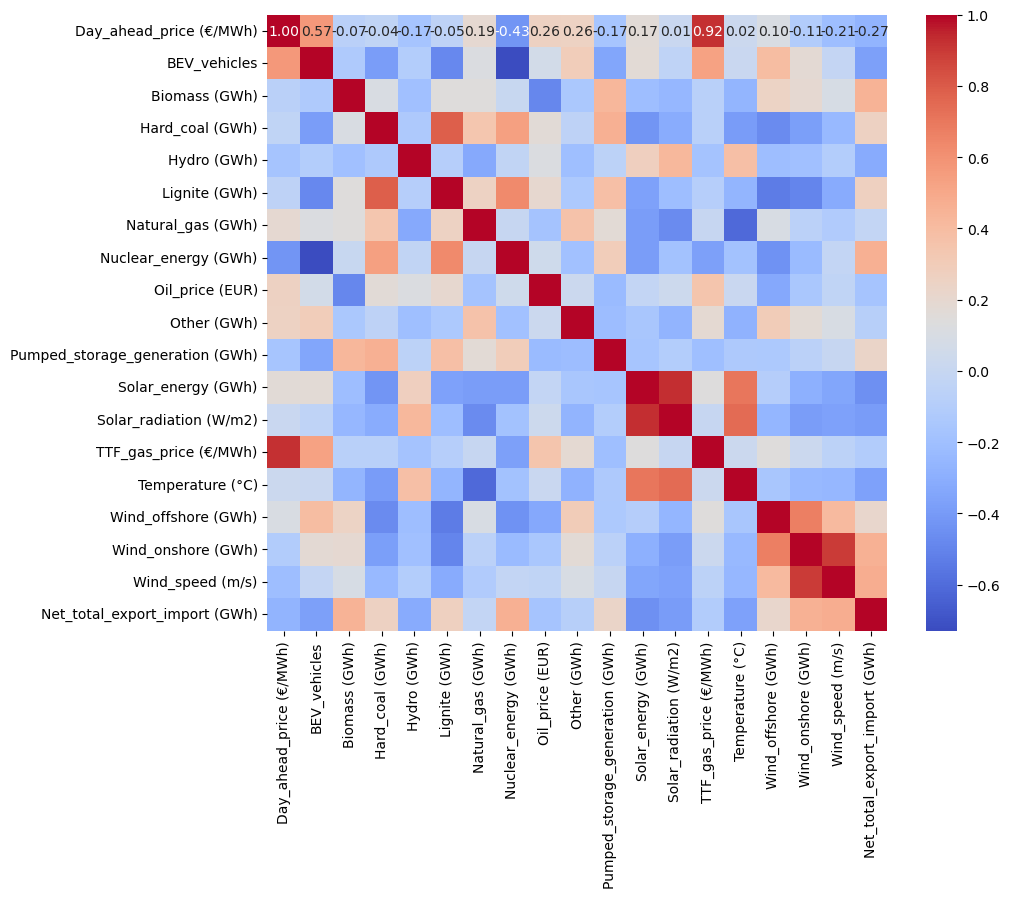

In [110]:
# Correlation matrix heatmap to understand the relationships
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## Augmented Dickey-Fuller (ADF) test

In [111]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(data['Day_ahead_price (€/MWh)'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretation
if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.")


ADF Statistic: -3.6619251250521323
p-value: 0.004681727043597106
Critical Values:
	1%: -3.4318343720880873
	5%: -2.8621959125651086
	10%: -2.567119146381682
The time series is stationary.


## Decomposition


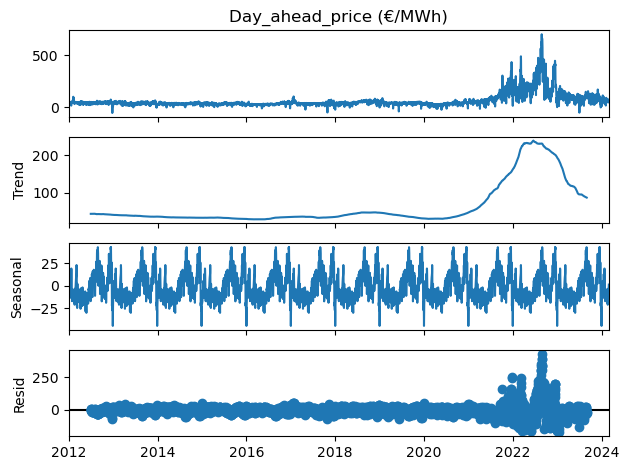

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Day_ahead_price (€/MWh)'], model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()


## Autocorrelation analysis


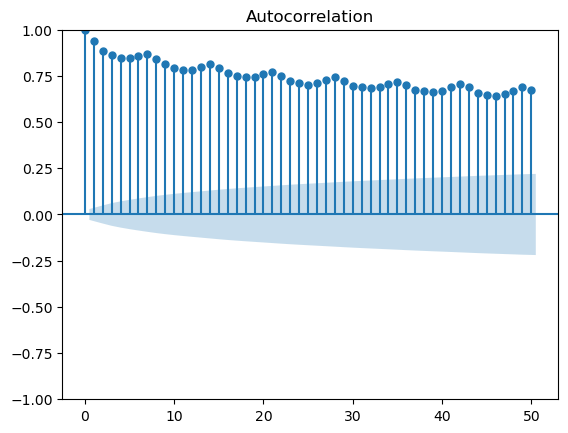

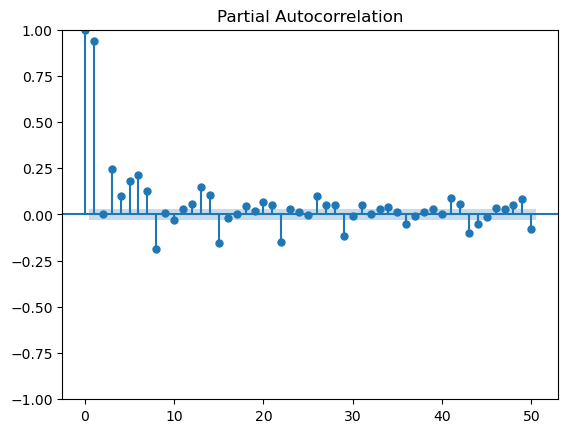

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation Function (ACF) plot
plot_acf(data['Day_ahead_price (€/MWh)'], lags=50)
plt.show()

# Partial Autocorrelation Function (PACF) plot
plot_pacf(data['Day_ahead_price (€/MWh)'], lags=50)
plt.show()


## Fourier transform

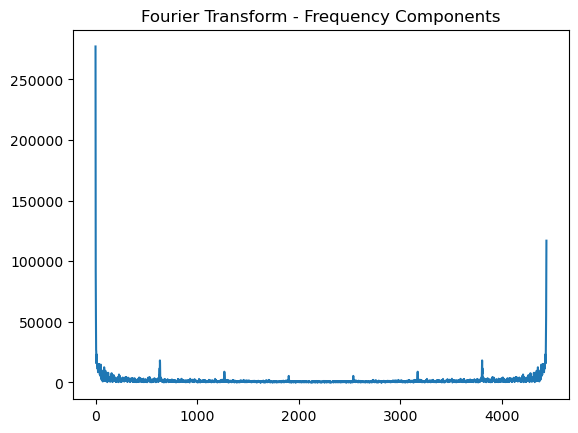

In [114]:
from numpy.fft import fft

# Compute the Fast Fourier Transform (FFT)
fft_results = fft(data['Day_ahead_price (€/MWh)'])
frequencies = np.abs(fft_results)

plt.plot(frequencies)
plt.title('Fourier Transform - Frequency Components')
plt.show()


## Linear Regression

In [115]:
# Define a function to split the data into training and testing sets in a 80/20 ratio
def train_test_split_sequential(X, y, test_size=0.2):
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test

In [131]:
# Create 3 lagged features for 'Day_ahead_price'
for lag in range(1, 4):
    data[f'Day_ahead_price_lag{lag}'] = data['Day_ahead_price (€/MWh)'].shift(lag)

# Check the first few rows to see the lagged features
data.head()


,Day_ahead_price (€/MWh),BEV_vehicles,Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Nuclear_energy (GWh),Oil_price (EUR),Other (GWh),...,Solar_radiation (W/m2),TTF_gas_price (€/MWh),Temperature (°C),Wind_offshore (GWh),Wind_onshore (GWh),Wind_speed (m/s),Net_total_export_import (GWh),Day_ahead_price_lag1,Day_ahead_price_lag2,Day_ahead_price_lag3
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,32.1633,6,98.605,189.633,47.101,323.976,252.289,270.613,103.15,52.194,...,25.21,21.40,4.78,7.828,541.528,8.04,22.924,NaN,NaN,NaN
2012-01-05,20.3500,6,98.605,175.733,45.854,327.502,259.018,287.555,103.92,52.179,...,13.46,21.30,4.23,8.280,572.819,9.98,35.618,32.1633,NaN,NaN
2012-01-06,36.2571,6,98.605,191.795,51.217,358.621,274.310,293.222,103.85,52.051,...,25.17,21.45,2.62,4.640,321.017,6.25,5.603,20.3500,32.1633,NaN
2012-01-07,32.5758,6,98.605,150.324,47.070,372.497,255.551,289.022,103.78,52.279,...,11.50,21.33,3.50,5.768,399.006,6.53,27.657,36.2571,20.3500,32.1633
2012-01-08,26.8283,6,98.605,189.718,48.467,354.178,256.892,286.206,103.71,52.178,...,17.54,21.33,3.74,3.639,251.722,5.21,26.066,32.5758,36.2571,20.3500


In [118]:
# Drop the rows with missing values
data.dropna(inplace=True)

# 'Day_ahead_price' is target variable
X = data.drop(['Day_ahead_price (€/MWh)'], axis=1)
y = data['Day_ahead_price (€/MWh)']


Model Coefficients: [ 0.00766911 -0.03220823  0.02137901  0.0057555   0.02089629  0.057618
  0.01277905 -0.03682729  0.12254558  0.23452076  0.02490096 -0.01917591
  0.83302664  0.50842049  0.04899927  0.00561841 -2.17939778 -0.04054719
  0.33484176 -0.04086347  0.098837  ]
Intercept: -23.94372510348073
Mean Squared Error (MSE): 1987.3302470167796
Root Mean Squared Error (RMSE): 44.5794823547423
Coefficient of Determination (R^2): 0.8424117579459266


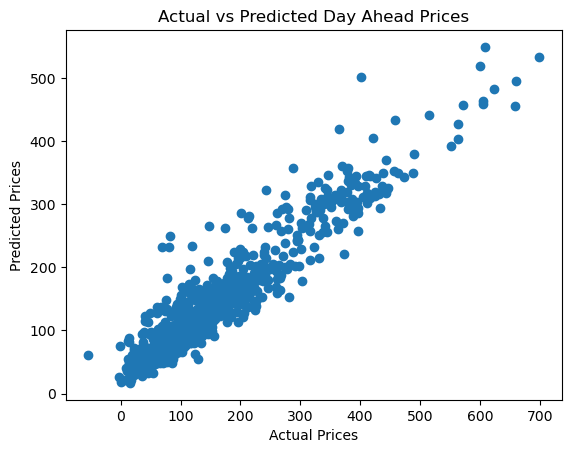

In [119]:
# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split_sequential(X, y, test_size=0.2)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Day Ahead Prices")
plt.show()

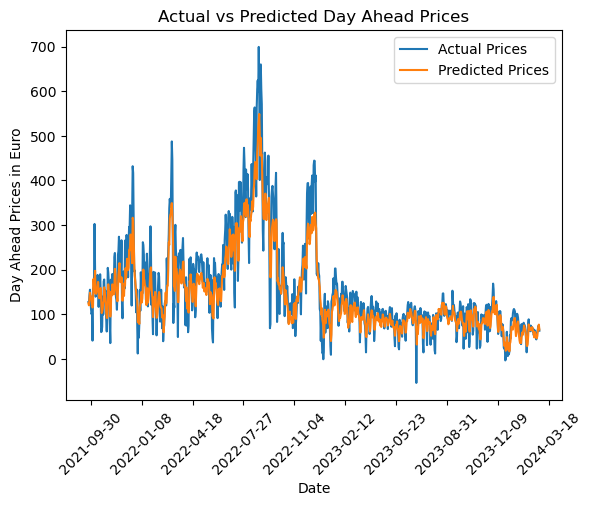

In [120]:
# Line plot of the predicted values and the original values over time, use index as date for x-axis, and 'Day_ahead_price' as y-axis
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.xlabel('Date')
# Show only the months in the date column
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=45)
plt.ylabel('Day Ahead Prices in Euro')
plt.title('Actual vs Predicted Day Ahead Prices')
plt.legend()

# save the plot
plt.savefig('actual_vs_predicted_prices.png')

## Applying the Time Series Split to Linear Regression

##### What is TimeSeriesSplit and why use it?

TimeSeriesSplit is a cross-validation method specifically designed for time series data. Unlike traditional k-fold cross-validation, where data can be randomly split into k subsets, time series data has a natural temporal ordering that must be respected. TimeSeriesSplit addresses this by ensuring that the training and test sets maintain this temporal order.

In time series forecasting, the model should only be trained on past data to predict future data. Using future data to predict the past would violate the temporal dependency and lead to data leakage, resulting in over-optimistic performance estimates.

##### How Does TimeSeriesSplit Work?

TimeSeriesSplit splits the data into several consecutive training and test sets. Here's how it works:

    n_splits: This parameter defines how many splits (or folds) the data will be divided into.
    Training Set: For each fold, the training set includes all data points up to a certain point in time.
    Test Set: The test set consists of the data points that come immediately after the training set in time.

In [145]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_time_series_split(X, y, n_splits_list):
    results = []

    for n_splits in n_splits_list:
        print(f"\nEvaluating with {n_splits} splits...")
        tscv = TimeSeriesSplit(n_splits=n_splits)

        mse_scores = []
        rmse_scores = []
        r2_scores = []
        best_mse = float('inf')
        best_model = None

        # Loop over each split
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Initialize and train the model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Evaluate performance
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            mse_scores.append(mse)
            rmse_scores.append(rmse)
            r2_scores.append(r2)

            print(f"Fold MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")

            # Check if this model is the best so far
            if mse < best_mse:
                best_mse = mse
                best_model = model

        # Calculate the average performance across all folds
        average_mse = np.mean(mse_scores)
        average_rmse = np.mean(rmse_scores)
        average_r2 = np.mean(r2_scores)

        print(f"\nAverage MSE across all folds: {average_mse:.4f}")
        print(f"Average RMSE across all folds: {average_rmse:.4f}")
        print(f"Average R^2 across all folds: {average_r2:.4f}")

        # Store the results for each split configuration
        results.append({
            'n_splits': n_splits,
            'average_mse': average_mse,
            'average_rmse': average_rmse,
            'average_r2': average_r2,
            'best_mse': best_mse,
            'best_model': best_model
        })

    return results

# Example usage:
n_splits_list = [5, 10, 15]  # You can try with 5, 10, 15 splits or more
results = evaluate_time_series_split(X, y, n_splits_list)

# Print the summary of results
print("\nSummary of results:")
for result in results:
    print(f"n_splits: {result['n_splits']}, Average MSE: {result['average_mse']:.4f}, Average RMSE: {result['average_rmse']:.4f}, Average R^2: {result['average_r2']:.4f}, Best MSE: {result['best_mse']:.4f}")



Evaluating with 5 splits...
Fold MSE: 240.5446, RMSE: 15.5095, R^2: -2.1360
Fold MSE: 61.2032, RMSE: 7.8232, R^2: 0.6051
Fold MSE: 69.6767, RMSE: 8.3473, R^2: 0.6144
Fold MSE: 1857.9815, RMSE: 43.1043, R^2: 0.5387
Fold MSE: 1362.3933, RMSE: 36.9106, R^2: 0.9033

Average MSE across all folds: 718.3599
Average RMSE across all folds: 22.3390
Average R^2 across all folds: 0.1051

Evaluating with 10 splits...
Fold MSE: 66.9361, RMSE: 8.1814, R^2: 0.4729
Fold MSE: 52.6625, RMSE: 7.2569, R^2: 0.2885
Fold MSE: 15.9002, RMSE: 3.9875, R^2: 0.7968
Fold MSE: 60.1410, RMSE: 7.7551, R^2: 0.5774
Fold MSE: 41.6656, RMSE: 6.4549, R^2: 0.7835
Fold MSE: 90.7635, RMSE: 9.5270, R^2: 0.5547
Fold MSE: 571.0777, RMSE: 23.8972, R^2: -2.5244
Fold MSE: 846.8462, RMSE: 29.1006, R^2: 0.7265
Fold MSE: 2733.0176, RMSE: 52.2783, R^2: 0.8342
Fold MSE: 303.7787, RMSE: 17.4292, R^2: 0.7455

Average MSE across all folds: 478.2789
Average RMSE across all folds: 16.5868
Average R^2 across all folds: 0.3256

Evaluating wit

The evaluation of the linear regression model across different numbers of time series splits (5, 10, and 15) shows significant variability in performance.

    - 5 Splits: The model demonstrates inconsistent performance with a wide range of MSE and RMSE values across the folds. The average MSE is 718.3599, and the average RMSE is 22.3390, indicating a relatively poor fit. The low average R² of 0.1051 suggests that the model explains only a small portion of the variance in the target variable, with some folds even showing negative R² values, indicating poor generalization on certain parts of the data.

    - 10 Splits: This configuration shows improved performance compared to the 5-split evaluation. The average MSE decreases to 478.2789, and the RMSE improves to 16.5868. The average R² increases to 0.3256, suggesting that the model is capturing more of the variance in the data. However, there is still notable variability in performance across different folds, with some folds performing significantly better and others worse.

    - 15 Splits: Increasing the number of splits to 15 results in a significant deterioration in model performance. The average MSE skyrockets to 15262.9996, and the RMSE increases to 47.3037. The average R² plummets to -71.8507, indicating that the model performs very poorly, with extreme outlier effects likely contributing to these results. This suggests that the model is overfitting and struggling to generalize when using more splits.

Conclusion:

The model performs best with 10 splits, providing a reasonable balance between MSE, RMSE, and R². While the performance is still inconsistent across different folds, this configuration offers the most reliable results. The significant drop in performance with 15 splits indicates that this level of splitting introduces too much variability and noise, leading to overfitting and poor generalization.

The results indicate that using more robust models suited for time series data, such as Gradient Boosting models or LSTMs may be useful.

### Load in the Application_data 

In [135]:
# Import the data
valid_data = load_and_prepare_data('./../../data/Application_data/Final_application_data/final_application_data.csv')
valid_data

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),Pumped_storage_generation (GWh),Solar_energy (GWh),Wind_offshore (GWh),Wind_onshore (GWh),Net_total_export_import (GWh),BEV_vehicles,Oil_price (EUR),TTF_gas_price (€/MWh),Nuclear_energy (GWh)
Date,,,,,,,,,,,,,,,,,,,
2024-03-01,70.93,65.50,3.14,5.81,124.839,68.840,55.295,252.736,256.269,61.390,15.691,99.970,109.303,258.820,-168.740,1012,77.45,25.5000,0
2024-03-02,63.99,101.71,3.25,7.75,124.742,48.551,53.621,192.488,222.065,55.669,12.299,178.801,98.946,264.598,-20.455,1012,77.22,26.3250,0
2024-03-03,61.08,111.42,3.31,8.15,124.469,56.956,50.715,206.578,209.388,52.162,8.209,202.653,101.406,235.637,43.071,1012,76.99,26.7375,0
2024-03-04,75.59,81.88,2.79,6.42,124.460,110.860,53.916,373.782,277.610,56.478,20.788,101.805,49.602,126.337,-149.007,1013,76.76,27.1500,0
2024-03-05,74.98,52.29,3.10,5.66,125.129,134.758,53.633,399.568,307.345,60.802,11.454,72.640,121.064,179.406,-74.175,1012,76.05,27.3700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,477.36,294.00,2.66,21.84,109.777,53.731,83.948,237.612,225.785,43.533,21.592,410.458,21.854,122.017,-84.296,1448,79.03,33.5500,0
2024-06-27,92.18,245.54,2.68,22.18,109.346,53.808,86.260,234.484,225.893,45.056,22.189,352.861,34.405,99.131,-221.636,1447,80.08,34.1600,0
2024-06-28,64.22,277.38,3.70,20.82,108.416,24.795,82.231,167.244,189.012,45.409,19.613,389.272,79.420,226.697,-118.481,1447,80.10,33.8500,0


In [136]:
# Delete all data after the end of JUne
valid_data = valid_data[valid_data.index < '2024-06-15']

In [137]:
valid_data

,Day_ahead_price (€/MWh),Solar_radiation (W/m2),Wind_speed (m/s),Temperature (°C),Biomass (GWh),Hard_coal (GWh),Hydro (GWh),Lignite (GWh),Natural_gas (GWh),Other (GWh),Pumped_storage_generation (GWh),Solar_energy (GWh),Wind_offshore (GWh),Wind_onshore (GWh),Net_total_export_import (GWh),BEV_vehicles,Oil_price (EUR),TTF_gas_price (€/MWh),Nuclear_energy (GWh)
Date,,,,,,,,,,,,,,,,,,,
2024-03-01,70.93,65.50,3.14,5.81,124.839,68.840,55.295,252.736,256.269,61.390,15.691,99.970,109.303,258.820,-168.740,1012,77.45,25.5000,0
2024-03-02,63.99,101.71,3.25,7.75,124.742,48.551,53.621,192.488,222.065,55.669,12.299,178.801,98.946,264.598,-20.455,1012,77.22,26.3250,0
2024-03-03,61.08,111.42,3.31,8.15,124.469,56.956,50.715,206.578,209.388,52.162,8.209,202.653,101.406,235.637,43.071,1012,76.99,26.7375,0
2024-03-04,75.59,81.88,2.79,6.42,124.460,110.860,53.916,373.782,277.610,56.478,20.788,101.805,49.602,126.337,-149.007,1013,76.76,27.1500,0
2024-03-05,74.98,52.29,3.10,5.66,125.129,134.758,53.633,399.568,307.345,60.802,11.454,72.640,121.064,179.406,-74.175,1012,76.05,27.3700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10,91.46,220.12,3.65,13.63,112.137,45.802,63.856,171.142,225.761,45.958,20.151,322.826,61.319,213.019,-131.061,1447,75.30,34.6500,0
2024-06-11,64.01,194.88,4.27,11.69,112.489,48.470,64.544,140.628,192.631,44.336,15.361,287.631,89.376,412.500,-32.782,1447,75.59,33.9300,0
2024-06-12,91.94,246.88,3.22,11.88,112.761,38.673,68.292,195.620,208.135,44.358,14.924,352.855,88.691,203.695,-108.137,1447,76.15,35.0300,0


In [138]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
valid_data = valid_data.copy()

# Let's create 3 lagged features for 'Day_ahead_price'
for lag in range(1, 4):
    valid_data[f'Day_ahead_price_lag{lag}'] = valid_data['Day_ahead_price (€/MWh)'].shift(lag)

# Drop rows containing NAs
valid_data.dropna(inplace=True)


In [139]:
# Ensure that columns of valid_data and data are in the same order
valid_data = valid_data[data.columns]

In [140]:
# Define the features and target variable
X_new = valid_data.drop(['Day_ahead_price (€/MWh)'], axis=1)
y_new = valid_data['Day_ahead_price (€/MWh)']

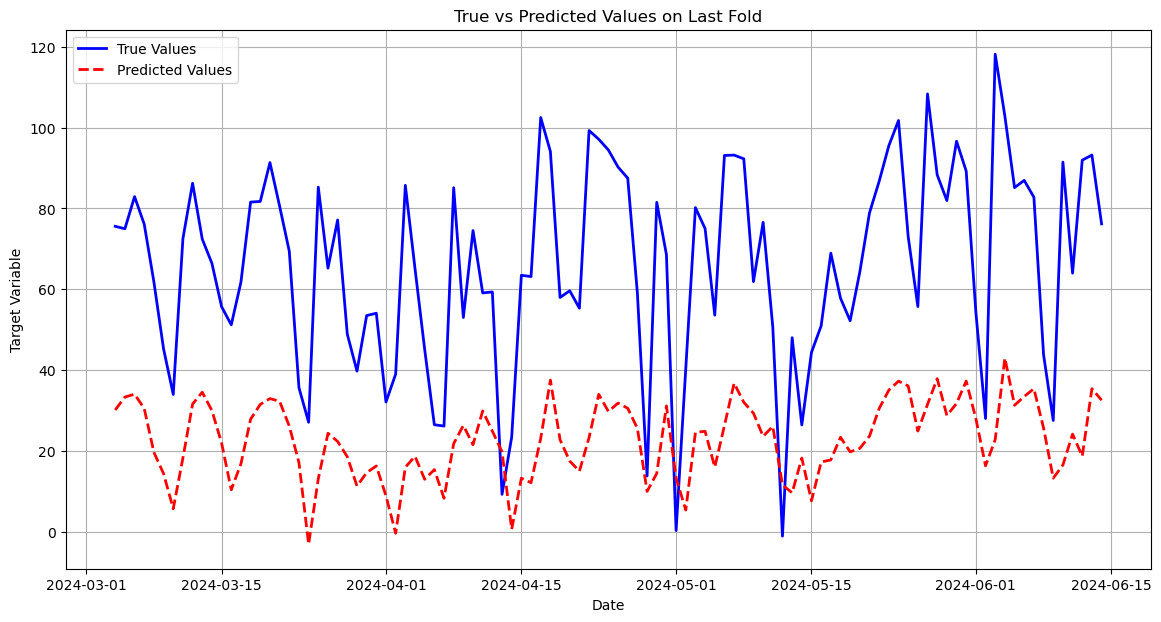

In [141]:
# Using the best model from cross-validation for prediction
y_new_pred = best_model.predict(X_new)

# visualize predictions from the best model 
plt.figure(figsize=(14, 7))
plt.plot(y_new.index, y_new, label='True Values', color='blue', linestyle='-', linewidth=2)
plt.plot(y_new.index, y_new_pred, label='Predicted Values', color='red', linestyle='--', linewidth=2)

plt.title('True vs Predicted Values on Last Fold')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
# Calculate error metrics
mse_valid = mean_squared_error(y_new, y_new_pred)
rmse_valid = np.sqrt(mse_valid)
r2_valid = r2_score(y_new, y_new_pred)

# Print the error metrics
print(f"Validation Set MSE: {mse_valid:.4f}")
print(f"Validation Set RMSE: {rmse_valid:.4f}")
print(f"Validation Set R^2: {r2_valid:.4f}")

Validation Set MSE: 2242.4778
Validation Set RMSE: 47.3548
Validation Set R^2: -2.7050
